In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('World_adult_salary.csv')
df

,Age,Workclass,Qualification,Marital status,occupation,sex,hours.per.week,Country,Income morethan 50k
0,30.0,Private,HS-grad,Never-married,Adm-clerical,Male,42.000000,United-States,0
1,20.0,Private,HS-grad,Never-married,Other-service,Male,40.000000,United-States,0
2,42.0,Federal-gov,Masters,Divorced,Adm-clerical,Male,60.000000,United-States,0
3,31.0,Private,11th,Never-married,Craft-repair,Male,40.000000,United-States,0
4,33.0,Private,Bachelors,Never-married,Handlers-cleaners,Male,40.000000,United-States,0
...,...,...,...,...,...,...,...,...,...
1658,44.0,Private,Some-college,Never-married,Other-service,Male,88.316770,United-States,0
1659,59.0,Private,Some-college,Never-married,Craft-repair,Male,88.428007,United-States,0
1660,32.0,Private,HS-grad,Divorced,Craft-repair,Male,88.539243,United-States,0
1661,25.0,Federal-gov,Some-college,Never-married,Prof-specialty,Female,88.650480,United-States,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1663 non-null   float64
 1   Workclass            1663 non-null   object 
 2   Qualification        1663 non-null   object 
 3   Marital status       1663 non-null   object 
 4   occupation           1663 non-null   object 
 5   sex                  1663 non-null   object 
 6   hours.per.week       1663 non-null   float64
 7   Country              1663 non-null   object 
 8   Income morethan 50k  1663 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 117.1+ KB


In [20]:
df.isnull().sum()

Age                    0
Workclass              0
Qualification          0
Marital status         0
occupation             0
sex                    0
hours.per.week         0
Country                0
Income morethan 50k    0
dtype: int64

In [21]:
df.dtypes

Age                    float64
Workclass               object
Qualification           object
Marital status          object
occupation              object
sex                     object
hours.per.week         float64
Country                 object
Income morethan 50k      int64
dtype: object

In [22]:
df.drop(['Marital status','sex'],axis=1,inplace=True)

In [23]:
df['Age']=df['Age'].astype(int)

In [24]:
df.dtypes

Age                      int64
Workclass               object
Qualification           object
occupation              object
hours.per.week         float64
Country                 object
Income morethan 50k      int64
dtype: object

In [25]:
df['Country'].unique()

array(['United-States', 'Philippines', 'England', 'China', 'Germany',
       'South', 'Italy', 'Japan', 'Taiwan', 'Hong', 'Honduras',
       'Puerto-Rico', 'Canada', 'India', 'Cuba', 'Ireland',
       'Trinadad&Tobago', 'Mexico', 'Iran', 'Cambodia', 'Peru',
       'Nicaragua', 'Dominican-Republic', 'Vietnam', 'Haiti'],
      dtype=object)

In [26]:
df.head()

,Age,Workclass,Qualification,occupation,hours.per.week,Country,Income morethan 50k
0,30,Private,HS-grad,Adm-clerical,42.0,United-States,0
1,20,Private,HS-grad,Other-service,40.0,United-States,0
2,42,Federal-gov,Masters,Adm-clerical,60.0,United-States,0
3,31,Private,11th,Craft-repair,40.0,United-States,0
4,33,Private,Bachelors,Handlers-cleaners,40.0,United-States,0


In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Workclass']=label.fit_transform(df['Workclass'])
df['Qualification']=label.fit_transform(df['Qualification'])
df['occupation']=label.fit_transform(df['occupation'])
df['Country']=label.fit_transform(df['Country'])

In [28]:
df.head()

,Age,Workclass,Qualification,occupation,hours.per.week,Country,Income morethan 50k
0,30,2,29,0,42.0,23,0
1,20,2,29,7,40.0,23,0
2,42,0,30,0,60.0,23,0
3,31,2,1,2,40.0,23,0
4,33,2,27,5,40.0,23,0


In [29]:
y=df['Income morethan 50k']
x=df.drop('Income morethan 50k',axis=1)

In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1658    0
1659    0
1660    0
1661    0
1662    0
Name: Income morethan 50k, Length: 1663, dtype: int64

In [31]:
x

,Age,Workclass,Qualification,occupation,hours.per.week,Country
0,30,2,29,0,42.000000,23
1,20,2,29,7,40.000000,23
2,42,0,30,0,60.000000,23
3,31,2,1,2,40.000000,23
4,33,2,27,5,40.000000,23
...,...,...,...,...,...,...
1658,44,2,33,7,88.316770,23
1659,59,2,33,2,88.428007,23
1660,32,2,29,2,88.539243,23
1661,25,0,33,8,88.650480,23


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
ypred=dt.predict(x_test)
ypred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [36]:
dt.score(x_test,y_test)

0.8768768768768769

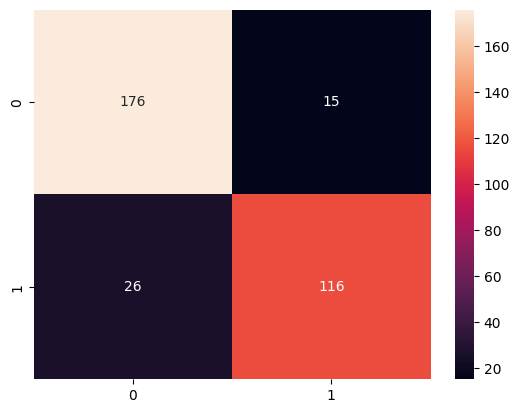

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)

sns.heatmap(cm, annot=True,fmt='g')
plt.show()